# Leitura dos dados das estações

In [378]:
# leitura dos dados da estações de medição de qualidade do ar
import pandas as pd
df_estacoes = pd.read_excel('Informações-estações.xlsx') 
df_estacoes.iloc[6,0] = 'Campinas'
df_estacoes.iloc[10,0] = 'Cubatão'
df_estacoes.iloc[16,0] = 'Guarulhos'
df_estacoes.iloc[17,0] = 'Santo André'
#df_estacoes = df_estacoes.drop(14) # São Caetano do Sul não tem dados
df_estacoes.iloc[14,4] = '-99.9'
df_estacoes.iloc[14,5] = '-99.9'
df_estacoes

,Estação,Código,Lat,Lon,PM10 (%),O3 (%)
0,Presidente Prudente,114,-22.11990,-51.40880,88.26,90.28
1,Araçatuba,107,-21.18680,-50.43930,86.71,85.62
2,São José do Rio Preto,116,-20.78470,-49.39830,86.85,82.51
3,Ribeirão Preto,288,-21.17708,-47.81900,76.71,69.58
4,Jaú,110,-22.29862,-48.56746,91.18,84.70
5,Jundiaí,109,-23.19200,-46.89710,92.07,89.68
6,Campinas,276,-22.87462,-47.05897,87.62,83.21
7,Paulínia,117,-22.77232,-47.15484,88.12,84.65
8,São José dos Campos,88,-23.18789,-45.87120,91.45,88.97
9,Guaratinguetá,289,-22.80192,-45.19112,63.40,82.89


# Declara função

In [379]:
def plota_linha(lon_inicial, lat_inicial, lon_final, lat_final, dx, dy, nome=None):
    
    """
    Plota uma linha entre dois pontos e adiciona um rótulo centralizado no ponto final.
    Se o nome tiver quebras de linha (\n), o texto será alinhado corretamente.
    """
    
    # Plota a linha
    ax.plot([lon_inicial, lon_final],
            [lat_inicial, lat_final],
            color='blue',
            linewidth=1.5,
            transform=ccrs.PlateCarree(),
            zorder=3)

    # Plota marcadores nos pontos
    #ax.scatter([lon_inicial, lon_final],
    #           [lat_inicial, lat_final],
    #           color='red',
    #           transform=ccrs.PlateCarree(),
    #           zorder=4)

    ax.scatter(lon_inicial,
               lat_inicial,
               color='red',
               transform=ccrs.PlateCarree(),
               zorder=4)

    # Adiciona o rótulo no ponto final se um nome for fornecido
    if nome:
        ax.text(lon_final + 0.1 + dx,  # Deslocamento horizontal
                lat_final - 0.4 + dy,  # Deslocamento vertical
                nome,
                transform=ccrs.PlateCarree(),
                color='black',
                alpha=0.8,
                fontsize=7,
                ha='center',              # Alinhamento horizontal centralizado
                va='center',              # Alinhamento vertical centralizado
                multialignment='center',  # Centraliza texto multilinha
                bbox=dict(facecolor='white', alpha=0.1, edgecolor='none'),
                zorder=5)

# Plota figura

0 Presidente Prudente 88.26
1 Araçatuba 86.71
2 São José do Rio Preto 86.85
3 Ribeirão Preto 76.71
4 Jaú 91.18
5 Jundiaí 92.07
6 Campinas 87.62
7 Paulínia 88.12
8 São José dos Campos 91.45
9 Guaratinguetá 63.40
10 Cubatão 91.17
11 Ibirapuera 56.69
12 Cidade Universitária USP 0.0
13 Parque Dom Pedro II 86.26
14 São Caetano do Sul -99.9
15 Diadema 88.57
16 Guarulhos 89.93
17 Santo André 94.81


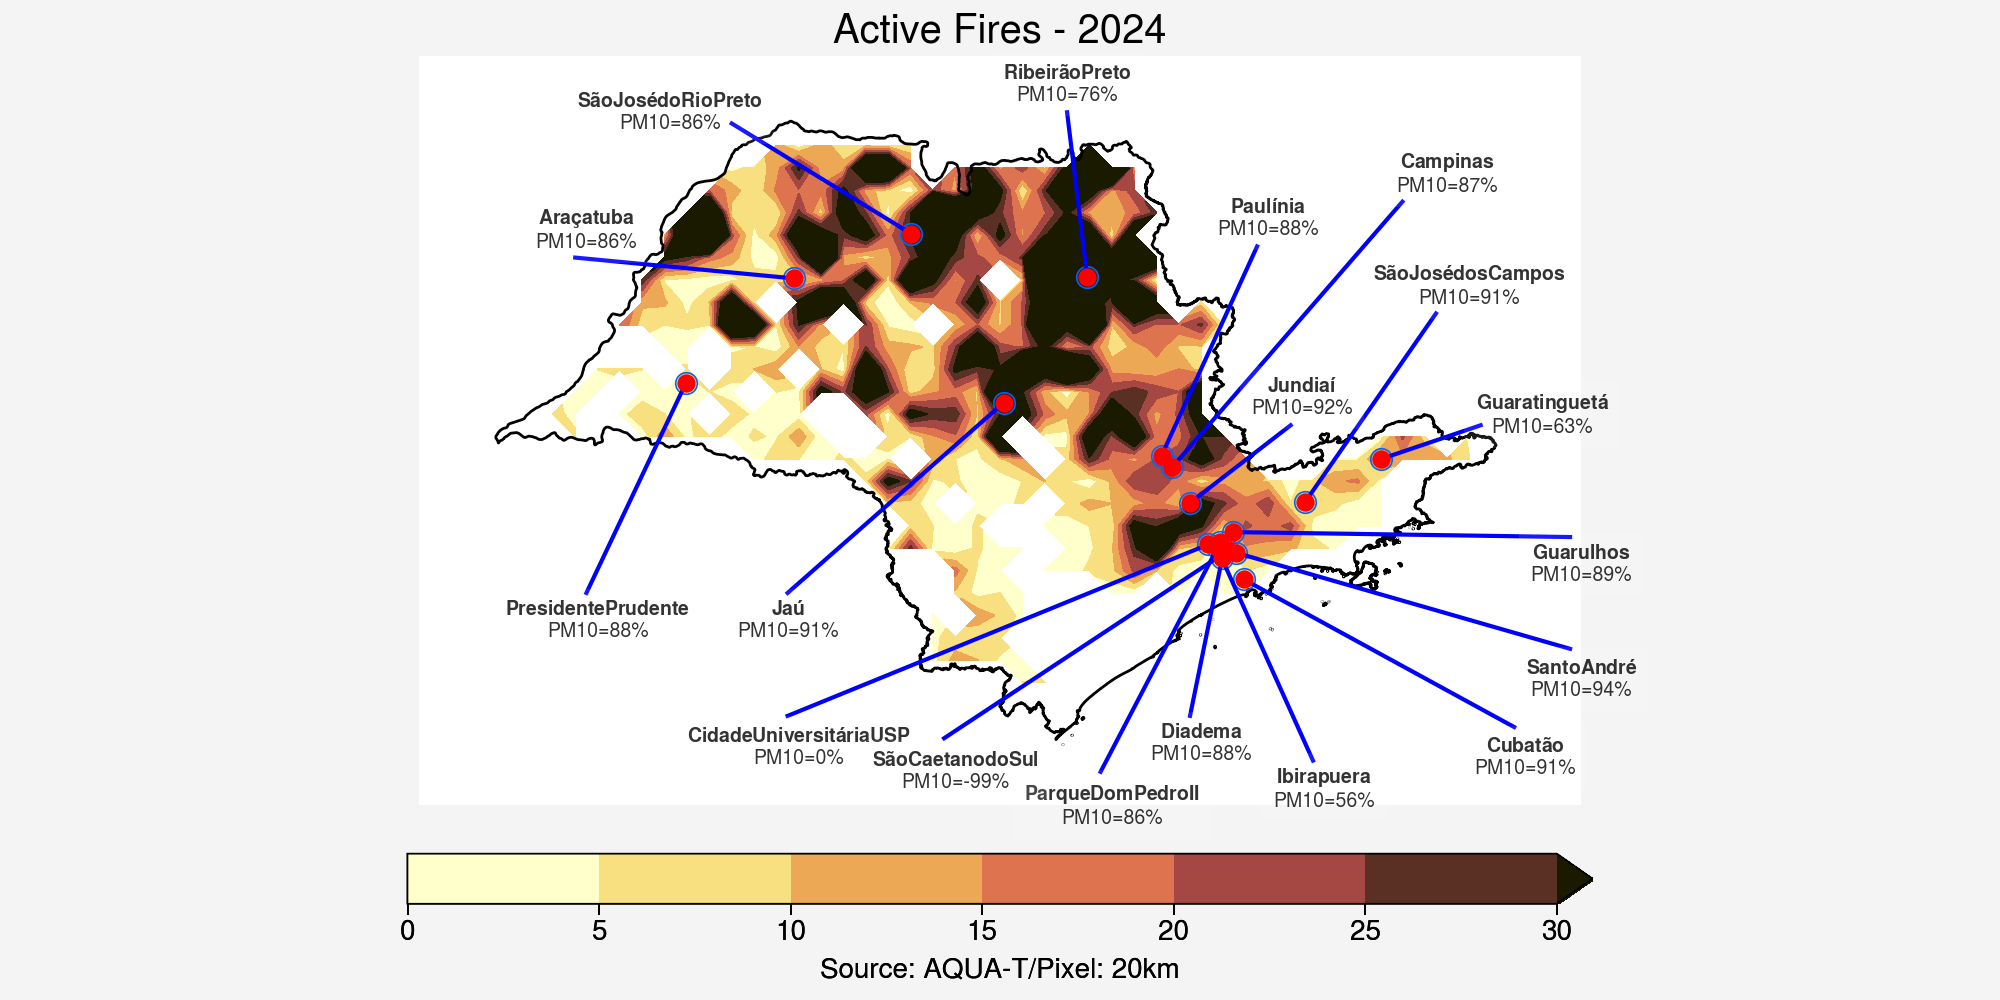

In [380]:
# importa bibliotecas
import salem
import xarray as xr
import proplot as pplt
import cartopy.io.shapereader as shpreader
import cartopy, cartopy.crs as ccrs  
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# leitura do shapefile de SP
shapefile_sp = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/UFs/SP/SP_UF_2019.shp')

# Limites de SP
lonmin_SP, lonmax_SP, latmin_SP, latmax_SP = -53.3-0.5, -43.9+0.5, -25.4-0.5, -19.7+0.5

# leitura do arquivo de 2024
focos_2024 = xr.open_dataset('output/03_netcdf_focos_por_ano/brasil_20km/focos_anual_brasil_20km_AQUA_2024.nc').salem.roi(shape=shapefile_sp)

# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(10,5),  
                        tight=True, 
                        proj='pcarree')

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=False, latlines=1.5, lonlines=3.5,
          latlim=(latmin_SP, latmax_SP), lonlim=(lonmin_SP, lonmax_SP),
          title=f'Active Fires - 2024',
          small='15px', large='20px',
          linewidth=0, grid=False)

# coloca "NaN" onde os "focos=0"
condicao = focos_2024['focos'][:,:] == 0
focos_2024['focos'][:,:] = np.where(condicao, np.nan, focos_2024['focos'][:,:])

# plota figura
map1 = ax.contourf(focos_2024['lon'],
                   focos_2024['lat'],
                   focos_2024['focos'][:,:],
                   cmap='lajolla',
                   vmin=0, vmax=30,
                   levels=pplt.arange(0, 30, 5),
                   extend='max')

# shapefile
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/main/UFs/SP/SP_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1.)

# estações
for i in range(len(df_estacoes)):

    # extrai informações da estação
    codigo = df_estacoes['Código'].iloc[i]
    municipio = df_estacoes['Estação'].iloc[i]
    lat = df_estacoes['Lat'].iloc[i]
    lon = df_estacoes['Lon'].iloc[i]
    pm10 = df_estacoes['PM10 (%)'].iloc[i]
    o3 = df_estacoes['O3 (%)'].iloc[i]
    print(i,municipio, pm10)
    
    # plota o símbolo da estação
    ax.scatter(lon, 
               lat,
               transform=ccrs.PlateCarree(),
               marker='o',
               s=60,
               facecolors='none',
               edgecolors='bright blue',
               zorder=2)
    #ax.text(lon, lat, i, color='b', s=10, transform=ccrs.PlateCarree(), zorder=4)

    # Define o ponto final da linha condicionalmente
    if i == 0:  
        lon_final, lat_final = -52.3, -24    # Presidente Prudente
        dx, dy = 0.0, 0.15
    elif i == 1:  
        lon_final, lat_final = -52.4, -21    # Araçatuba
        dx, dy = 0.0, 0.65
    elif i == 2:  
        lon_final, lat_final = -51., -19.8  # São José do Rio Preto
        dx, dy = -0.65, 0.50
    elif i == 3:  
        lon_final, lat_final = -48, -19.7    # Ribeirão Preto
        dx, dy = -0.1, 0.65   
    elif i == 4:  
        lon_final, lat_final = -50.5, -24.   # Jaú
        dx, dy = -0.1, 0.15
    elif i == 5:  
        lon_final, lat_final = -46, -22.5    # Jundiaí
        dx, dy = 0.0, 0.65        
    elif i == 6:  
        lon_final, lat_final = -45, -20.5    # Campinas (Taquaral)
        dx, dy = 0.3, 0.65      
    elif i == 7:  
        lon_final, lat_final = -46.3, -20.9   # Paulínia
        dx, dy = 0.0, 0.65
    elif i == 8:  
       lon_final, lat_final = -44.7, -21.5   # São José dos Campos
       dx, dy = 0.2, 0.65         
    elif i == 9:  
        lon_final, lat_final = -44.3, -22.5    # Guaratinguetá
        dx, dy = 0.45, 0.5        
    elif i == 10:  
        lon_final, lat_final = -44, -25.2    # Cubatão (Centro)
        dx, dy = 0.0, 0.13
    elif i == 11:  
        lon_final, lat_final = -45.8, -25.5  # Ibirapuera    
        dx, dy = 0.0 , 0.15 
    elif i == 12:  
        lon_final, lat_final = -50.5, -25.1  # Cidade Universitária USP
        dx, dy = 0.0, 0.12
    elif i == 13:  
        lon_final, lat_final = -47.7, -25.6  # Parque Dom Pedro II
        dx, dy = 0.0, 0.10
    elif i == 14:  
        lon_final, lat_final = -49.1, -25.3  # São Caetano do Sul
        dx, dy = 0.0, 0.10
    elif i == 15:  
        lon_final, lat_final = -46.9, -25.1  # Diadema   
        dx, dy = 0.0, 0.15
    elif i == 16:  
        lon_final, lat_final = -43.5, -23.5  # Guarulhos (Paço Municipal)   
        dx, dy = 0.0, 0.15        
    else:
         lon_final, lat_final = -43.5, -24.5 # Santo André (Capuava)
         dx, dy = 0.0, 0.13  
        
    pm10_int = int(float(pm10))
    
    nome = f"$\mathbf{{{municipio}}}$\nPM10={pm10_int}%"
    
    plota_linha(lon_inicial=lon, 
                lat_inicial=lat, 
                lon_final=lon_final, 
                lat_final=lat_final, 
                dx=dx, dy=dy,
                nome=nome)

# plota barra de cores da figura
fig.colorbar(map1, 
             loc='b',
             label='Source: AQUA-T/Pixel: 20km', 
             ticks=5, 
             ticklabelsize=10, 
             labelsize=10, 
             length=0.60, 
             width=0.25)

# salva figura
fig.savefig('output/focos_e_estacoes.jpg', transparent=True, dpi=300, bbox_inches="tight")